In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
import joblib
import csv
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn import metrics
from commonFunctions import *

In [2]:
def shadow_removalDialate(img):
    # img2 = cv2.imread(f'../Dataset_0-5/men/{num}/4_men (49).JPG')
    img2 = cv2.resize(img, (256, 256))
    
    img_hls = cv2.cvtColor(img2, cv2.COLOR_BGR2HLS)

    # define lower and upper bounds for blue color in HLS format
    lower_blue = np.array([0, 0, 60])
    upper_blue = np.array([20, 255, 255])

    # create a mask for blue color in HLS format
    mask = cv2.inRange(img_hls, lower_blue, upper_blue)
    # daialation
    kernel = np.ones((3,3),np.uint8)
    mask = cv2.dilate(mask,kernel,iterations = 8)
    # apply the mask to the original image
    result = cv2.bitwise_and(img2, img2, mask=mask)
    # show_images([img2, mask, result], ["Original Image", "dialation", "masked"])
    # io.imshow(img2)
    return result

In [5]:
def walid(img):
    # Load the input image
    # # Image Rescaling
    img2 = cv2.resize(img, (320, 180))
    # show_images([img2])

    # Image Enhancement
    img_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    img_gray = cv2.equalizeHist(img_gray)
    # show_images([img_gray])

    # Background Subtraction
    fgbg = cv2.createBackgroundSubtractorMOG2()
    fgmask = fgbg.apply(img_gray)
    Background_Subtraction = cv2.bitwise_and(img_gray, img_gray, mask=fgmask)
    # show_images([Background_Subtraction])

    # Noise Reduction
    Noise_Reduction = cv2.medianBlur(Background_Subtraction, 5)
    # show_images([Noise_Reduction])
    return Noise_Reduction


In [4]:
def preprocessing(img,img2):
    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply histogram equalization to enhance contrast and remove lighting effects
    equalized = cv2.equalizeHist(gray)
    # io.imshow(equalized)
    # # Find the contours of the binary image
    contours, hierarchy = cv2.findContours(equalized, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    max_contour = max(contours, key=cv2.contourArea)

    # # Draw the largest contour on the original image
    cv2.drawContours(img2, [max_contour], 0, (0, 255, 0), 2)
    # io.imshow(img2)
    # # Show the image with the largest contour drawn
    # # Create a bounding box around the hand
    x, y, w, h = cv2.boundingRect(max_contour)

    # # Crop the image to the bounding box around the hand
    hand = equalized[y:y+h, x:x+w]
    img3 = cv2.resize(hand, (256, 256))
    # io.imshow(img3)

    return img3

In [12]:
def modified_walid(img):
    img2 = cv2.resize(img, (320, 180))
    # shadow_removalDialateimg=shadow_removalDialate(img2)
    img_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    result_image = cv2.equalizeHist(img_gray)
    # show_images([result_image])
    img_hls = cv2.cvtColor(img2, cv2.COLOR_BGR2HLS)
    # define lower and upper bounds for blue color in HLS format
    lower_blue = np.array([0, 0, 60])
    upper_blue = np.array([20, 255, 255])
    # create a mask for blue color in HLS format
    mask = cv2.inRange(img_hls, lower_blue, upper_blue)
    # daialation
    kernel = np.ones((3,3),np.uint8)
    mask = cv2.dilate(mask,kernel,iterations = 8)
    # apply the mask to the original image
    result = cv2.bitwise_and(result_image, result_image, mask=mask)
    # show_images([img2, mask, result], ["Original Image", "dialation", "masked"])
    # apply canny edge detection
    return result

In [3]:
# Load the image
img = cv2.imread('../Dataset_0-5/men/1/1_men (102).JPG')

# resize
img = cv2.resize(img, (800,600))

# Convert to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Compute mean and standard deviation
mean, std_dev = cv2.meanStdDev(gray_img)

# Apply global contrast normalization
gray_img = (gray_img - mean) / std_dev

# Display the normalized image
cv2.imshow('Normalized Image', gray_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [6]:
import cv2
import numpy as np

# Load the image
img = cv2.imread('../Dataset_0-5/men/1/1_men (102).JPG')

# resize
img = cv2.resize(img, (800,600))

# Convert to HSV color space
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Define the lower and upper threshold values for the shadow color
lower = np.array([0, 0, 0], dtype=np.uint8)
upper = np.array([180, 255, 70], dtype=np.uint8)


# Alternatively, you can adjust the threshold values to better isolate the shadow pixels
# lower = np.array([0, 0, 0], dtype=np.uint8)
# upper = np.array([180, 50, 50], dtype=np.uint8)

# Create a mask for the shadow pixels
mask = cv2.inRange(hsv_img, lower, upper)

# Remove the shadow pixels from the image
no_shadow_img = cv2.bitwise_and(img, img, mask=cv2.bitwise_not(mask))

# Display the results
cv2.imshow('Original Image', img)
cv2.imshow('Mask', mask)
cv2.imshow('Image without Shadows', no_shadow_img)
cv2.waitKey(0)
cv2.destroyAllWindows()


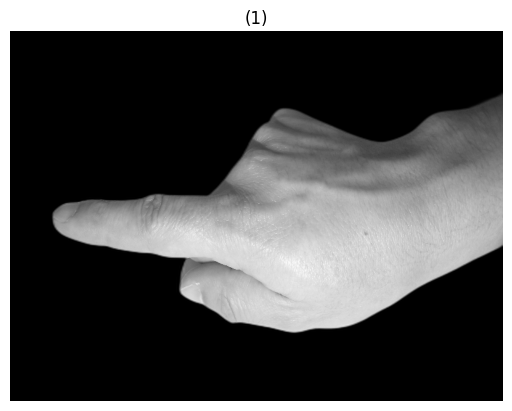

In [2]:
img = cv2.imread('../Dataset_0-5/men/1/1_men (109).JPG')
img = cv2.resize(img, (800,600))
removed_bg = remove(img)
gray_img = cv2.cvtColor(removed_bg, cv2.COLOR_BGR2GRAY)
show_images([gray_img])




0.9996977552777477


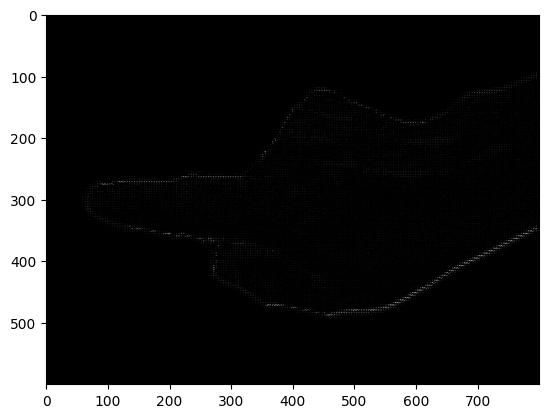

In [5]:
hog = Hog_descriptor(gray_img, cell_size=4, bin_size=9)
vector, image = hog.extract()
print(np.max(np.array(vector).flatten()))
plt.imshow(image, cmap='gray')
plt.show()

In [ ]:
import csv
import numpy as np

# Read the CSV file
with open('features.csv', mode='r') as file:
    reader = csv.reader(file)
    data = []
    for row in reader:
        # Convert the row to a NumPy array
        vec = np.array(row, dtype=float)
        # Append the vector to the data list
        data.append(vec)

# Convert the data list to a NumPy array
data = np.array(data)

# Print the shape of the data array
print("Data shape:", data.shape)

In [13]:
# Create an empty CSV file and write the header
# csv_file = open('hog_features.csv', 'w', newline='')
# csv_writer = csv.writer(csv_file)
# csv_writer.writerow(['label', 'hog_features'])


arr = ["0","1","2","3","4","5"]
data=[]
hog_features = []
lower_blue = np.array([0, 0, 65])
upper_blue = np.array([20, 255, 255])


for label in arr:
    dirList = glob.glob("../Dataset_0-5/men/"+str(label)+"/*.jpg")
    
    for img_path in dirList:
        try:
            im= cv2.imread(img_path)
            # img = cv2.resize(im, (256,256))
            # removed_bg = remove(img)
            # img_hls = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
            # mask = cv2.inRange(img_hls, lower_blue, upper_blue)
            # gray_img = cv2.cvtColor(removed_bg, cv2.COLOR_BGR2GRAY)
            # result_image=shadow_removalDialate(img)
            # preprocessed_image=preprocessing(result_image,img)
            preprocessed_image=modified_walid(im)
            
            hog = Hog_descriptor(preprocessed_image, cell_size=4, bin_size=9)
            vector, image = hog.extract()
            vec = np.array(vector)
            hog_features.append(vec.flatten())
            data.append(label)
            
            # Write the label and HOG features to the CSV file
            # csv_writer.writerow([label, vec.flatten()])
        except:
            pass
        
# train_x,test_x,train_y,test_y = train_test_split(hog_features,data, test_size = 0.2)
# classifier=SVC(kernel="linear", random_state=6)
# classifier.fit(train_x,train_y)
# joblib.dump(classifier, "model/hands3")


In [14]:
# Create an empty CSV file and write the header
# csv_file = open('hog_features.csv', 'w', newline='')
# csv_writer = csv.writer(csv_file)
# csv_writer.writerow(['label', 'hog_features'])


arr = ["0","1","2","3","4","5"]
# lower_blue = np.array([0, 0, 65])
# upper_blue = np.array([20, 255, 255])


for label in arr:
    dirList = glob.glob("../Dataset_0-5/Women/"+str(label)+"/*.jpg")
    
    for img_path in dirList:
        try:
            im= cv2.imread(img_path)
            # img = cv2.resize(im, (256,256))
            # removed_bg = remove(img)
            # img_hls = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
            # mask = cv2.inRange(img_hls, lower_blue, upper_blue)
            # gray_img = cv2.cvtColor(removed_bg, cv2.COLOR_BGR2GRAY)
            # result_image=shadow_removalDialate(img)
            # preprocessed_image=preprocessing(result_image,img)
            preprocessed_image=modified_walid(im)
            
            hog = Hog_descriptor(preprocessed_image, cell_size=4, bin_size=9)
            vector, image = hog.extract()
            vec = np.array(vector)
            hog_features.append(vec.flatten())
            data.append(label)
            
            # Write the label and HOG features to the CSV file
            # csv_writer.writerow([label, vec.flatten()])
        except:
            pass
        
# train_x,test_x,train_y,test_y = train_test_split(hog_features,data, test_size = 0.2)
# classifier=SVC(kernel="linear", random_state=6)
# classifier.fit(train_x,train_y)
# joblib.dump(classifier, "model/hands3")


In [15]:
train_x,test_x,train_y,test_y = train_test_split(hog_features,data, test_size = 0.2)
classifier=SVC(kernel="linear", random_state=6)
classifier.fit(train_x,train_y)
joblib.dump(classifier, "model/models3")

['model/models3']

In [16]:
prediction=classifier.predict(test_x)
print("Accuracy= ",metrics.accuracy_score(prediction, test_y))
print("Precision= ",metrics.precision_score(prediction, test_y, average='weighted'))
print("Recall= ",metrics.recall_score(prediction, test_y, average='weighted'))
print("F1 Score= ",metrics.f1_score(prediction, test_y, average='weighted'))
print("Confusion Matrix= ",metrics.confusion_matrix(prediction, test_y))
print("Classification Report= ",metrics.classification_report(prediction, test_y))

Accuracy=  0.6712328767123288
Precision=  0.6826667743359867
Recall=  0.6712328767123288
F1 Score=  0.6715421698248294
Confusion Matrix=  [[55  2  0  0  0  1]
 [ 3 52 14  4  0  1]
 [ 0  2 34 12  5  3]
 [ 0  0 16 26 18  6]
 [ 0  0  3 18 28  7]
 [ 0  0  0  0  5 50]]
Classification Report=                precision    recall  f1-score   support

           0       0.95      0.95      0.95        58
           1       0.93      0.70      0.80        74
           2       0.51      0.61      0.55        56
           3       0.43      0.39      0.41        66
           4       0.50      0.50      0.50        56
           5       0.74      0.91      0.81        55

    accuracy                           0.67       365
   macro avg       0.68      0.68      0.67       365
weighted avg       0.68      0.67      0.67       365



In [17]:
from sklearn.ensemble import AdaBoostClassifier

adab_clf = AdaBoostClassifier(random_state=42)
adab_clf.fit(train_x, train_y)

RandomForestClassifier(n_estimators=300)

In [18]:
prediction=adab_clf.predict(test_x)
print("Accuracy= ",metrics.accuracy_score(prediction, test_y))
print("Precision= ",metrics.precision_score(prediction, test_y, average='weighted'))
print("Recall= ",metrics.recall_score(prediction, test_y, average='weighted'))
print("F1 Score= ",metrics.f1_score(prediction, test_y, average='weighted'))
print("Confusion Matrix= ",metrics.confusion_matrix(prediction, test_y))
print("Classification Report= ",metrics.classification_report(prediction, test_y))

Accuracy=  0.6109589041095891
Precision=  0.6302244113404074
Recall=  0.6109589041095891
F1 Score=  0.6153005686868653
Confusion Matrix=  [[46  2  1  0  5  3]
 [ 7 46 16  4  0  1]
 [ 1  6 29  8  0  2]
 [ 1  0 12 29 14  9]
 [ 1  0  4 15 27  7]
 [ 2  2  5  4 10 46]]
Classification Report=                precision    recall  f1-score   support

           0       0.79      0.81      0.80        57
           1       0.82      0.62      0.71        74
           2       0.43      0.63      0.51        46
           3       0.48      0.45      0.46        65
           4       0.48      0.50      0.49        54
           5       0.68      0.67      0.67        69

    accuracy                           0.61       365
   macro avg       0.61      0.61      0.61       365
weighted avg       0.63      0.61      0.62       365



In [8]:
with open('data.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    for i in range(len(hog_features)):
        # Write one row at a time, with the label in the first column
        row = [data[i]] + list(hog_features[i])
        writer.writerow(row)

In [ ]:
train_x,test_x,train_y,test_y = train_test_split(hog_features,data, test_size = 0.2)
# if descriptors is None:
#             descriptors = descriptor
#         else:
#             descriptors = np.vstack((descriptors, descriptor))

In [ ]:
classifier=SVC(kernel="linear", random_state=6)
classifier.fit(train_x,train_y)
joblib.dump(classifier, "model/char_rec")

In [12]:
print(np.shape(vector))

(29651, 36)


In [15]:
print(np.shape(vector))

(29651, 36)


In [6]:
win_size = (64, 128)
block_size = (16, 16)
block_stride = (8, 8)
cell_size = (8, 8)
nbins = 9

# Create a HOG descriptor object
hog = cv2.HOGDescriptor(win_size, block_size, block_stride, cell_size, nbins)
print(hog.compute(gray_img).shape)
print(hog.compute(gray_img).flatten().max())

(21092400,)
0.9835917


In [19]:
print(hog.compute(gray_img).shape)


(21092400,)


In [2]:
import pandas as pd

# Read the CSV file into a pandas dataframe
df = pd.read_csv('data.csv')

# Extract the label column into a separate variable
labels = df.iloc[:, 0]

# Extract the feature columns into a separate variable
features = df.iloc[:, 1:]


MemoryError: 

In [4]:
import csv
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import joblib
labels = []
features = []
with open("../data.csv", 'r') as file:
  csvreader = csv.reader(file)
  for row in csvreader:
    # print(row)
    labels.append(row[0])
    features.append(row[1:])

In [11]:
train_x,test_x,train_y,test_y = train_test_split(features,labels, test_size = 0.3)
classifier=SVC(kernel="rbf", random_state=6)
classifier.fit(train_x,train_y)
joblib.dump(classifier, "model/allhands2")

['model/allhands2']

In [ ]:
from sklearn import metrics

prediction=classifier.predict(test_x)
print("Accuracy= ",metrics.accuracy_score(prediction, test_y))
print("Precision= ",metrics.precision_score(prediction, test_y, average='weighted'))
print("Recall= ",metrics.recall_score(prediction, test_y, average='weighted'))
print("F1 Score= ",metrics.f1_score(prediction, test_y, average='weighted'))
print("Confusion Matrix= ",metrics.confusion_matrix(prediction, test_y))
print("Classification Report= ",metrics.classification_report(prediction, test_y))